In [66]:
import numpy as np
import pandas as pd


In [67]:
df = pd.read_csv('spam.csv', encoding='latin1')  # or try 'iso-8859-1', 'cp1252', etc.

In [68]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [69]:
df.shape

(5572, 5)

Data_CLEANING


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [71]:
#We will drop the last three Columns

In [72]:
df.drop(columns=[df.columns[4],df.columns[3],df.columns[2]],inplace=True)

In [73]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [74]:
#renaming the colums
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [75]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [77]:
df['target']=encoder.fit_transform(df['target'])

In [78]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [79]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [80]:
df.duplicated().sum()

np.int64(403)

In [81]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


EDA

In [82]:
import matplotlib.pyplot as plt

In [83]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

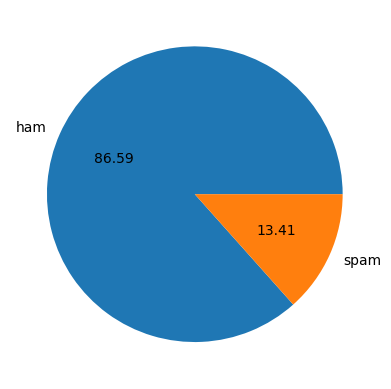

In [84]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [85]:
#Data is imbalanced

In [86]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [87]:
import nltk

In [88]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5572, dtype: int64

In [90]:
df['num_characters']=df['text'].apply(len)

In [91]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [92]:
# First download the NLTK tokenizer (if not already done)

# Then tokenize the text column
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [93]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [94]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
# First download the NLTK tokenizer (if not already done)
import nltk
nltk.download('punkt')

# Then tokenize the text column
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
def simple_tokenize(text):
    return text.split()
    
df['text'].apply(lambda x: simple_tokenize(x))

0       [Go, until, jurong, point,, crazy.., Available...
1                    [Ok, lar..., Joking, wif, u, oni...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor..., U, c, already...
4       [Nah, I, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568       [Will, Ì_, b, going, to, esplanade, fr, home?]
5569    [Pity,, *, was, in, mood, for, that., So...any...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                    [Rofl., Its, true, to, its, name]
Name: text, Length: 5572, dtype: object

In [97]:
# Create a simple tokenizer function
def simple_tokenize(text):
    if isinstance(text, str):
        return text.split()
    return []

# Apply it to your dataframe
df['token_count'] = df['text'].apply(lambda x: len(simple_tokenize(x)))

In [98]:
df

,target,text,num_characters,num_words,token_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,20
1,0,Ok lar... Joking wif u oni...,29,8,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,28
3,0,U dun say so early hor... U c already then say...,49,13,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,13
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,30
5568,0,Will Ì_ b going to esplanade fr home?,37,9,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,10
5570,0,The guy did some bitching but I acted like i'd...,125,27,26


In [99]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [100]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [101]:


# Then tokenize the text column
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5572, dtype: int64

In [102]:
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [103]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [104]:
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [105]:
df

,target,text,num_characters,num_words,token_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,20,2
1,0,Ok lar... Joking wif u oni...,29,8,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,28,2
3,0,U dun say so early hor... U c already then say...,49,13,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,13,1
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,30,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,10,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,26,1


In [106]:
import nltk
nltk.download('punkt')  # Download the Punkt tokenizer data

# Now tokenize your text
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:
df.drop(columns=['token_count'],inplace=True)

In [108]:
df

,target,text,num_characters,num_words,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [109]:
df[[df.columns[2],df.columns[3],df.columns[4]]].describe()

,num_characters,num_words,sentence_count
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


HAM

In [110]:
df[df['target']==0][['num_characters','sentence_count','num_words']].describe()

,num_characters,sentence_count,num_words
count,4825.000000,4825.000000,4825.000000
mean,71.023627,1.837720,17.276269
std,58.016023,1.454388,13.988585
min,2.000000,1.000000,1.000000
25%,33.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,92.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


SPAM

In [111]:
df[df['target']==1][['num_characters','sentence_count','num_words']].describe()

,num_characters,sentence_count,num_words
count,747.000000,747.000000,747.000000
mean,138.866131,3.021419,27.891566
std,29.183082,1.537580,6.867007
min,13.000000,1.000000,2.000000
25%,132.500000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [112]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

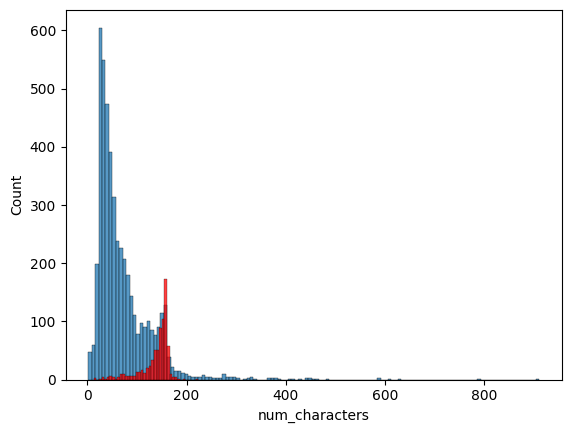

In [113]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

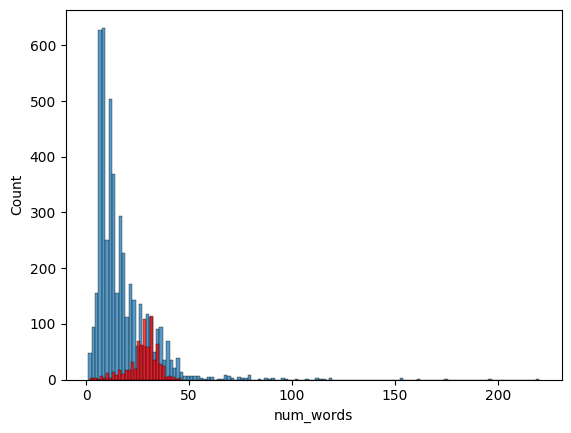

In [114]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [115]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

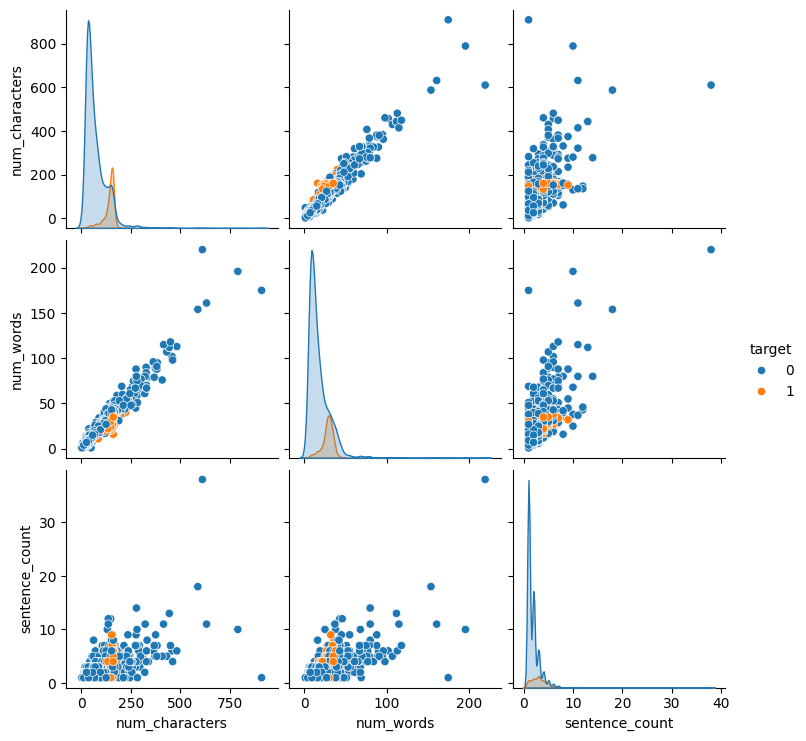

In [116]:
sns.pairplot(df,hue='target')

In [117]:
flights=sns.load_dataset('flights')

In [118]:
flights.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [119]:
flights.pivot_table(index='year',columns='month',values='passengers',aggfunc='sum')

C:\Users\asus\AppData\Local\Temp\ipykernel_21844\2984402683.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(index='year',columns='month',values='passengers',aggfunc='sum')


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [120]:
x=flights.pivot_table(index='year',columns='month',values='passengers',aggfunc='sum')

C:\Users\asus\AppData\Local\Temp\ipykernel_21844\955399597.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  x=flights.pivot_table(index='year',columns='month',values='passengers',aggfunc='sum')


<Axes: xlabel='month', ylabel='year'>

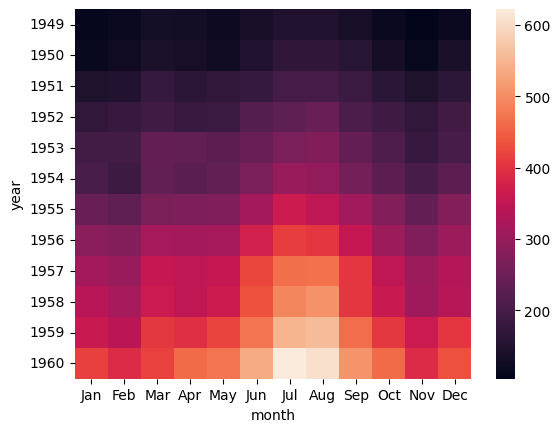

In [121]:
sns.heatmap(x)

<Axes: xlabel='month', ylabel='year'>

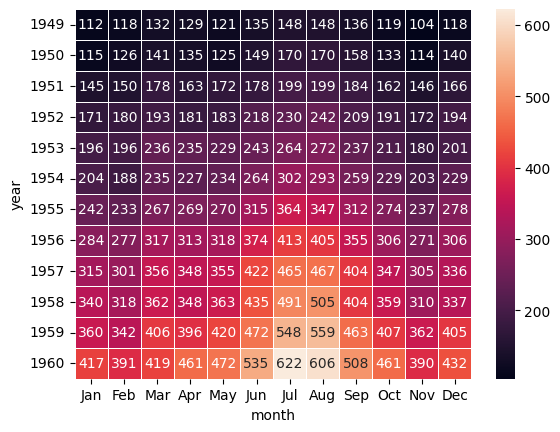

In [122]:
sns.heatmap(x,linewidths=0.5,annot=True,fmt='d')

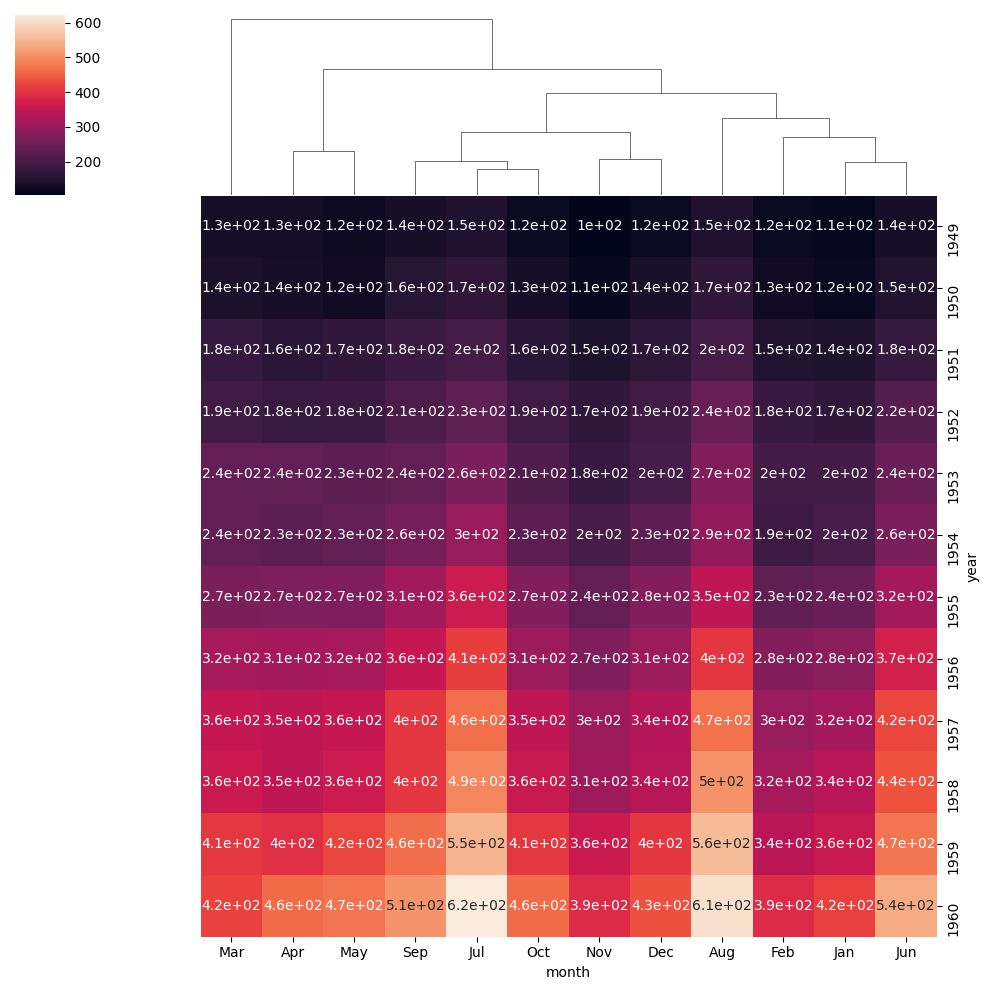

In [123]:
sns.clustermap(x,metric='correlation',row_cluster=False,annot=True)

3.Data_Processing

In [124]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [126]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [127]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)#Text ki cheeze List mein convert ho chuki h
    y=[]
    for i in text:
        if i.isalnum():#For removing the special characters
            y.append(i)
    
    text=y[:]#We need to do the cloning
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:     
        y.append(ps.stem(i))   #ps ke module h jisme cheeze exist karti h
        
    return y

In [128]:
transform_text(df['text'][10])

['gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today']

In [129]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Dancing")

'danc'

In [130]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [131]:
df['text'].apply(transform_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [132]:
df['transformed_text']=df['text'].apply(transform_text)

In [133]:
df

,target,text,num_characters,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,"[2nd, time, tri, 2, contact, u, pound, prize, ..."
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,"[b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"[piti, mood, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,"[guy, bitch, act, like, interest, buy, someth,..."


In [134]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [135]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            5572 non-null   int64 
 1   text              5572 non-null   object
 2   num_characters    5572 non-null   int64 
 3   num_words         5572 non-null   int64 
 4   sentence_count    5572 non-null   int64 
 5   transformed_text  5572 non-null   object
dtypes: int64(4), object(2)
memory usage: 261.3+ KB


In [137]:
# Remove commas and join with spaces
text = df[df['target']==1]['transformed_text'].astype(str).str.replace(',', '').str.cat(sep=" ")
spam_wc = wc.generate(text)

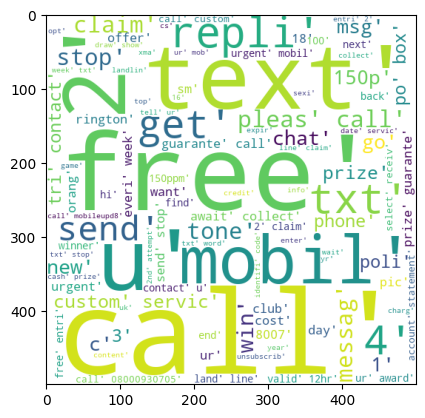

In [138]:
plt.imshow(spam_wc)

In [139]:
df['transformed_text']

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: transformed_text, Length: 5572, dtype: object

In [140]:
# Remove commas and join with spaces
text = df[df['target']==0]['transformed_text'].astype(str).str.replace(',', '').str.cat(sep=" ")
ham_wc = wc.generate(text)

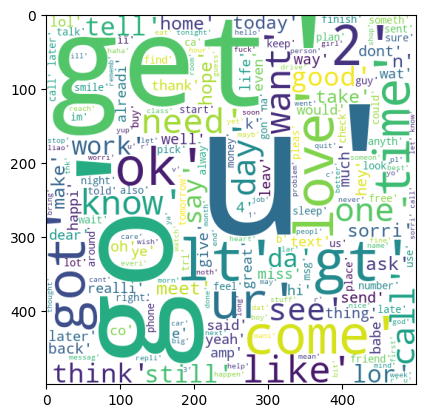

In [141]:
plt.imshow(ham_wc)

In [142]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].astype(str).tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [143]:
len(spam_corpus)

11490

In [144]:
pip install collection


Note: you may need to restart the kernel to use updated packages.


In [145]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[("'call',", 349),
 ("'free',", 178),
 ("'2',", 173),
 ("'txt',", 165),
 ("'text',", 134),
 ("'mobil',", 126),
 ("'ur',", 122),
 ("'4',", 118),
 ("'u',", 116),
 ("'claim',", 113),
 ("'repli',", 108),
 ("'stop',", 99),
 ("'prize',", 86),
 ("'get',", 77),
 ("'tone',", 72),
 ("'servic',", 68),
 ("'send',", 67),
 ("'nokia',", 65),
 ("'new',", 63),
 ("'award',", 61),
 ("'week',", 60),
 ("'cash',", 58),
 ("'contact',", 58),
 ("'phone',", 57),
 ("['urgent',", 53),
 ("'win',", 52),
 ("'collect',", 49),
 ("'pleas',", 46),
 ("'min',", 46),
 ("'c',", 44)]

In [146]:
Counter(spam_corpus).most_common(30)

[("'call',", 349),
 ("'free',", 178),
 ("'2',", 173),
 ("'txt',", 165),
 ("'text',", 134),
 ("'mobil',", 126),
 ("'ur',", 122),
 ("'4',", 118),
 ("'u',", 116),
 ("'claim',", 113),
 ("'repli',", 108),
 ("'stop',", 99),
 ("'prize',", 86),
 ("'get',", 77),
 ("'tone',", 72),
 ("'servic',", 68),
 ("'send',", 67),
 ("'nokia',", 65),
 ("'new',", 63),
 ("'award',", 61),
 ("'week',", 60),
 ("'cash',", 58),
 ("'contact',", 58),
 ("'phone',", 57),
 ("['urgent',", 53),
 ("'win',", 52),
 ("'collect',", 49),
 ("'pleas',", 46),
 ("'min',", 46),
 ("'c',", 44)]

In [147]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].astype(str).tolist():
    for word in msg.split():
        ham_corpus.append(word)

4.MODEL_BUILDING

In [148]:
df

,target,text,num_characters,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,"[2nd, time, tri, 2, contact, u, pound, prize, ..."
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,"[b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"[piti, mood, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,"[guy, bitch, act, like, interest, buy, someth,..."


In [149]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer()

In [150]:
tfdif=TfidfTransformer()

In [151]:
# Convert lists in 'transformed_text' to strings
text_data = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Now fit_transform should work
X = cv.fit_transform(text_data).toarray()

In [152]:
print(cv.vocabulary_)

{'go': 2762, 'jurong': 3393, 'point': 4608, 'crazi': 1806, 'avail': 1017, 'bugi': 1385, 'great': 2835, 'world': 6556, 'la': 3497, 'buffet': 1383, 'cine': 1610, 'got': 2801, 'amor': 837, 'wat': 6391, 'ok': 4289, 'lar': 3528, 'joke': 3364, 'wif': 6484, 'oni': 4312, 'free': 2610, 'entri': 2291, 'wkli': 6524, 'comp': 1695, 'win': 6494, 'fa': 2404, 'cup': 1855, 'final': 2497, 'tkt': 5987, '21st': 322, 'may': 3839, 'text': 5878, '87121': 609, 'receiv': 4900, 'question': 4819, 'std': 5598, 'txt': 6137, 'rate': 4863, 'appli': 906, '08452810075over18': 62, 'dun': 2174, 'say': 5139, 'earli': 2190, 'hor': 3059, 'alreadi': 815, 'nah': 4071, 'think': 5925, 'goe': 2768, 'usf': 6246, 'live': 3632, 'around': 943, 'though': 5940, 'freemsg': 2617, 'hey': 2995, 'darl': 1900, 'week': 6421, 'word': 6550, 'back': 1056, 'like': 3602, 'fun': 2657, 'still': 5619, 'tb': 5833, 'xxx': 6612, 'chg': 1569, 'send': 5207, 'rcv': 4873, 'even': 2336, 'brother': 1359, 'speak': 5508, 'treat': 6081, 'aid': 772, 'patent': 4

In [153]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [154]:
X.shape

(5572, 6708)

In [155]:
y=df['target'].values

In [156]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [158]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [159]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [160]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [161]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.873542600896861
[[843 114]
 [ 27 131]]
0.5346938775510204


In [162]:
mnb.fit(X_train,y_train)
y_pred2=gnb.predict(X_test)

In [163]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.873542600896861
[[843 114]
 [ 27 131]]
0.5346938775510204


In [164]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

In [165]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [166]:
import pickle

In [167]:
pickle.dump(cv,open('Vectorize.pkl','wb'))

In [168]:
pickle.dump(mnb,open('model.pkl','wb'))

In [169]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [170]:
import streamlit as st

In [171]:
pickle.dump(cv,open('Vectorize.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [172]:
st.title("Emial/SMS Spam Classifier")

2025-04-14 18:03:31.682 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 18:03:32.268 
  command:

    streamlit run C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-14 18:03:32.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [173]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


st.title("Email/SMS Spam Classifier")

input_sms = st.text_area("Enter the message")

if st.button('Predict'):

    # 1. preprocess
    transformed_sms = transform_text(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 1:
        st.header("Spam")
    else:
        st.header("Not Spam")

2025-04-14 18:03:32.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 18:03:32.305 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 18:03:32.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 18:03:32.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 18:03:32.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 18:03:32.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 18:03:32.315 Session state does not function when running a script without `streamlit run`
2025-04-14 18:03:32.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 18:03